<a href="https://colab.research.google.com/github/Giraj12/EDA--Capstone-Project/blob/main/Amazon_Shows_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Amazon prime tvshows/movies analysis




##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name -**          Giraj Neema



# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Giraj12/EDA--Capstone-Project.git

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [97]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_column', None)
pd.set_option("display.max_rows", None)
pd.set_option('display.float_format', '{:.2f}'.format)  # keeps 2 decimal places


### Dataset Loading

In [98]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
titles_df=pd.read_csv("/content/drive/MyDrive/amazon data/titles.csv/titles.csv")
credits_df=pd.read_csv("/content/drive/MyDrive/amazon data/credits.csv/credits.csv")

In [100]:
titles_df.head() # first view of the titles_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.00,tt0850645,8.60,1092.00,15.42,7.60
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.20,89766.00,8.65,8.00
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.10,63026.00,8.44,7.80
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.80,57835.00,11.27,7.40
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.90,30924.00,8.27,7.60


In [101]:
credits_df.head() # first view of the credits_df

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [102]:
# final data after inner join
df=pd.merge(titles_df,credits_df, on='id', how='inner') # This df contains information about those shows or movies for which actor or director's data is present.

### Dataset First View

In [103]:
# Dataset First Look
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.00,tt0850645,8.60,1092.00,15.42,7.60,59401,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.00,tt0850645,8.60,1092.00,15.42,7.60,31460,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.00,tt0850645,8.60,1092.00,15.42,7.60,31461,Larry Fine,Larry,ACTOR
3,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.20,89766.00,8.65,8.00,21174,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.20,89766.00,8.65,8.00,28713,Marion Mack,Annabelle Lee,ACTOR


In [104]:
df.tail()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
124342,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.40,49.00,0.65,NaN,1938589,Sangam Shukla,Madhav,ACTOR
124343,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.40,49.00,0.65,NaN,1938565,Vijay Thakur,Sanjay Thakur,ACTOR
124344,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.40,49.00,0.65,NaN,728899,Vanya Wellens,Budhiya,ACTOR
124345,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.40,49.00,0.65,NaN,1938620,Vishwa Bhanu,Gissu,ACTOR
124346,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.40,49.00,0.65,NaN,1938620,Vishwa Bhanu,NaN,DIRECTOR


### Dataset Rows & Columns count

In [105]:
# Dataset Rows & Columns count
df.shape

(124347, 19)

### Dataset Information

In [106]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124347 entries, 0 to 124346
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    124347 non-null  object 
 1   title                 124347 non-null  object 
 2   type                  124347 non-null  object 
 3   description           124256 non-null  object 
 4   release_year          124347 non-null  int64  
 5   age_certification     56707 non-null   object 
 6   runtime               124347 non-null  int64  
 7   genres                124347 non-null  object 
 8   production_countries  124347 non-null  object 
 9   seasons               8153 non-null    float64
 10  imdb_id               119044 non-null  object 
 11  imdb_score            118296 non-null  float64
 12  imdb_votes            118272 non-null  float64
 13  tmdb_popularity       124332 non-null  float64
 14  tmdb_score            114082 non-null  float64
 15  

#### Duplicate Values

In [107]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(168)

#### Missing Values/Null Values

In [108]:
# Missing Values/Null Values Count
df.isnull().mean()*100

,0
id,0.00
title,0.00
type,0.00
description,0.07
release_year,0.00
age_certification,54.40
runtime,0.00
genres,0.00
production_countries,0.00
seasons,93.44


,0
id,0
title,0
type,0
description,91
release_year,0
age_certification,67640
runtime,0
genres,0
production_countries,0
seasons,116194


<ipython-input-109-fb0c73c118e3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.values, y=missing_data.index, palette='flare')


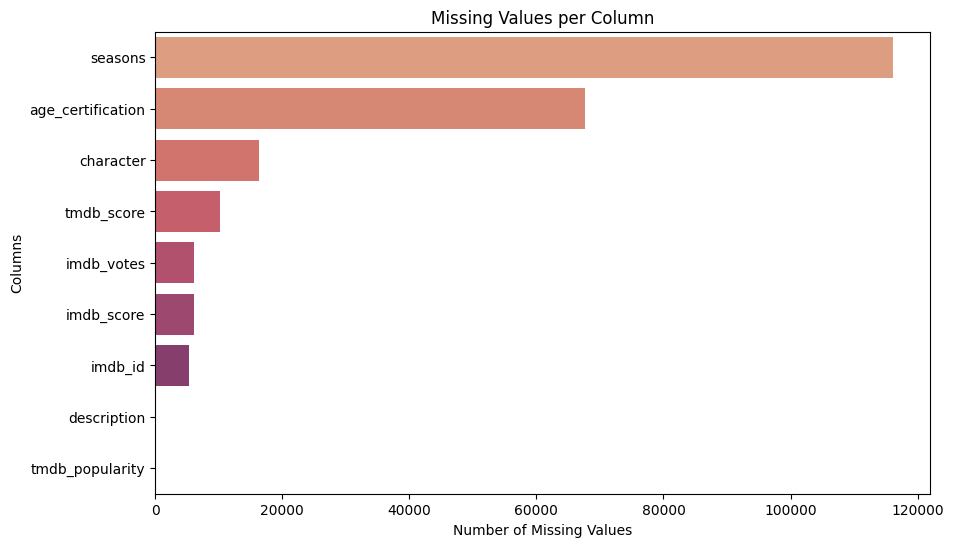

In [109]:
# Calculate missing values
missing_data = df.isnull().sum()
display(missing_data)
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=missing_data.values, y=missing_data.index, palette='flare')
plt.title('Missing Values per Column')
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.show()



### What did you know about your dataset?

The dataset contains detailed information on TV shows and movies available on Amazon Prime, with a total of 124,347 entries and 19 features including title, genre, runtime, cast, director, popularity, seasons, age certification, and ratings from both IMDb and TMDb. During initial exploration, it was observed that the dataset has missing values, particularly in the seasons and age certification columns, which may be due to the nature of the content (e.g., movies not having seasons). Additionally, there are 168 duplicate rows that need to be handled during data cleaning to ensure accuracy in analysis.

## ***2. Understanding Your Variables***

In [110]:
# Dataset Columns
list(df.columns)

['id',
 'title',
 'type',
 'description',
 'release_year',
 'age_certification',
 'runtime',
 'genres',
 'production_countries',
 'seasons',
 'imdb_id',
 'imdb_score',
 'imdb_votes',
 'tmdb_popularity',
 'tmdb_score',
 'person_id',
 'name',
 'character',
 'role']

In [111]:
# Dataset Describe
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id
count,124347.00,124347.00,8153.00,118296.00,118272.00,124332.00,114082.00,124347.00
mean,1996.23,95.54,2.34,5.97,23242.81,10.17,5.99,406252.79
std,27.81,30.17,3.13,1.24,88401.51,40.74,1.32,561448.25
min,1912.00,1.00,1.00,1.10,5.00,0.00,0.80,1.00
25%,1983.00,83.00,1.00,5.20,287.00,1.88,5.30,38996.00
50%,2009.00,93.00,1.00,6.10,1250.00,3.88,6.10,133934.00
75%,2017.00,109.00,2.00,6.80,7067.00,8.79,6.80,571160.00
max,2022.00,540.00,49.00,9.90,1133692.00,1437.91,10.00,2371153.00


In [112]:
df.describe(include='object')

,id,title,type,description,age_certification,genres,production_countries,imdb_id,name,character,role
count,124347,124347,124347,124256,56707,124347,124347,119044,124347,108040,124347
unique,8861,8748,2,8833,11,1965,482,8267,79758,71097,2
top,tm458582,Coming 2 America,MOVIE,Prince Akeem Joffer is set to become King of Z...,R,['drama'],['US'],tt6802400,George 'Gabby' Hayes,Himself,ACTOR
freq,137,137,116194,137,25931,9853,69385,137,49,1540,115952


### Variables Description

1. **id:**
Unique identifier for each content item (movie or show).

2. **title:**
Name of the TV show or movie.

3. **type:**
Indicates whether the content is a movie or TV show.

4. **description:**
A short summary or synopsis of the content.

5. **release_year:**
The year the content was first released.

6. **age_certification:**
Official age rating (e.g., PG, R, TV-MA), indicating content suitability.

7. **runtime:**
Duration of the movie or episode in minutes.

8. **genres:**
List of genres associated with the content (e.g., Drama, Comedy, Thriller).

9. **production_countries:**
Countries where the content was produced (may be a list).

10. **seasons:**
Number of seasons (only applicable for TV shows; null for movies).

11. **imdb_id**
Unique ID of the title on IMDb (can be used to fetch more metadata if needed).

12. **imdb_score**
IMDb rating score (typically on a scale from 0 to 10).

13. **imdb_votes**
Number of user votes for the IMDb score.
14. **tmdb_popularity**
Popularity score from TMDb (relative metric based on views, interactions, etc.).

15. **tmdb_score**
TMDb user rating (also typically on a scale from 0 to 10).

16. **person_id**
Unique identifier for a person involved in the content (actor, director, etc.).

17. **name**
Name of the person (actor, director, etc.).

18. **character**
The character name portrayed by the person (for actors).

19. **role**
The role of the person (e.g., ACTOR, DIRECTOR, etc.).




### Check Unique Values for each variable.

In [113]:
# Check Unique Values for each variable.
df.nunique()

,0
id,8861
title,8748
type,2
description,8833
release_year,110
age_certification,11
runtime,204
genres,1965
production_countries,482
seasons,30


## 3. ***Data Wrangling***

### Data Wrangling Code

In [114]:
# Write your code to make your dataset analysis ready.

# duplicates treatment
df.drop_duplicates(inplace=True)





In [115]:
# checking rows with same movie
condition=df.duplicated(subset=['id'])
df[condition].head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.00,tt0850645,8.60,1092.00,15.42,7.60,31460,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.00,tt0850645,8.60,1092.00,15.42,7.60,31461,Larry Fine,Larry,ACTOR
4,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.20,89766.00,8.65,8.00,28713,Marion Mack,Annabelle Lee,ACTOR
5,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.20,89766.00,8.65,8.00,28714,Glen Cavender,Captain Anderson,ACTOR
6,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.20,89766.00,8.65,8.00,28715,Jim Farley,General Thatcher,ACTOR
7,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.20,89766.00,8.65,8.00,27348,Frederick Vroom,A Southern General,ACTOR
8,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.20,89766.00,8.65,8.00,28716,Charles Henry Smith,Annabelle's Father,ACTOR
9,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.20,89766.00,8.65,8.00,28718,Joe Keaton,Union General,ACTOR
10,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.20,89766.00,8.65,8.00,28721,Al St. John,Officer on Horseback (uncredited),ACTOR
11,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.20,89766.00,8.65,8.00,28717,Frank Barnes,Annabelle's Brother,ACTOR


In [116]:
# check whether a actor has multiple roles in a same movie. If yes i will keep only one row for such actors.
condition=df.duplicated(subset=['id',
 'title',
 'type',
 'description',
 'release_year',
 'age_certification',
 'runtime',
 'genres',
 'production_countries',
 'seasons',
 'imdb_id',
 'imdb_score',
 'imdb_votes',
 'tmdb_popularity',
 'tmdb_score',
 'person_id',
 'name','role'],keep=False)

df[(condition)]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
1704,tm77319,Santa Fe Trail,MOVIE,As a penalty for fighting fellow classmates da...,1940,NaN,110,"['western', 'war', 'drama', 'history', 'romance']",['US'],NaN,tt0033021,6.20,3754.00,5.92,5.80,61125,Jack Deery,Party Guest (uncredited),ACTOR
1705,tm77319,Santa Fe Trail,MOVIE,As a penalty for fighting fellow classmates da...,1940,NaN,110,"['western', 'war', 'drama', 'history', 'romance']",['US'],NaN,tt0033021,6.20,3754.00,5.92,5.80,61125,Jack Deery,Preacher at Wedding (uncredited),ACTOR
1853,tm4525,He Walked by Night,MOVIE,"This film-noir piece, told in semi-documentary...",1949,NaN,79,"['thriller', 'crime']",['US'],NaN,tt0040427,7.10,5943.00,5.25,6.70,58703,Thomas Browne Henry,Dunning,ACTOR
1872,tm4525,He Walked by Night,MOVIE,"This film-noir piece, told in semi-documentary...",1949,NaN,79,"['thriller', 'crime']",['US'],NaN,tt0040427,7.10,5943.00,5.25,6.70,58703,Thomas Browne Henry,Dunning (uncredited),ACTOR
4412,tm73200,Li'l Abner,MOVIE,Li'l Abner becomes convinced that he is going ...,1940,G,78,"['comedy', 'romance']",['US'],NaN,tt0032703,4.90,457.00,3.42,8.50,21174,Buster Keaton,Lonesome Polecat,ACTOR
4423,tm73200,Li'l Abner,MOVIE,Li'l Abner becomes convinced that he is going ...,1940,G,78,"['comedy', 'romance']",['US'],NaN,tt0032703,4.90,457.00,3.42,8.50,21174,Buster Keaton,NaN,ACTOR
6047,tm85300,Outlaws of the Desert,MOVIE,"Hoppy, Johnny and California go to Arabia to b...",1941,NaN,66,"['western', 'action']",['US'],NaN,tt0033989,5.80,151.00,1.10,NaN,134027,Bill Nestell,Man from Waukegan,ACTOR
6048,tm85300,Outlaws of the Desert,MOVIE,"Hoppy, Johnny and California go to Arabia to b...",1941,NaN,66,"['western', 'action']",['US'],NaN,tt0033989,5.80,151.00,1.10,NaN,134027,Bill Nestell,Cowhand,ACTOR
6218,tm54261,Indiscreet,MOVIE,A young woman jeopardizes the relationship wit...,1931,NaN,92,"['drama', 'romance', 'comedy']",['US'],NaN,tt0022000,6.20,1447.00,1.06,5.80,69200,Sam Lufkin,Ship's Purser (uncredited),ACTOR
6219,tm54261,Indiscreet,MOVIE,A young woman jeopardizes the relationship wit...,1931,NaN,92,"['drama', 'romance', 'comedy']",['US'],NaN,tt0022000,6.20,1447.00,1.06,5.80,69200,Sam Lufkin,Baseball Captain (uncredited),ACTOR


In [117]:
# keeping only the row for those actors who did multiple roles in a same movie.
df.drop_duplicates(subset=['id',
 'title',
 'type',
 'description',
 'release_year',
 'age_certification',
 'runtime',
 'genres',
 'production_countries',
 'seasons',
 'imdb_id',
 'imdb_score',
 'imdb_votes',
 'tmdb_popularity',
 'tmdb_score',
 'person_id',
 'name','role'],keep='first', inplace=True)

In [118]:
df.shape

(124003, 19)

In [119]:
# null value treatment
# age_certification
# df['age_certification'].value_counts()
# df_sub=df[df['age_certification'].isna()]
# df_sub[df_sub['release_year']>2019].head(200)


# For this column almost 55% values are null so i checked about the ratings of some shows and movies randomly.
# from research i found out that some movies or shows were released even before rating system was intoduced, so they were not rated thats why the age_certification value for those shows/movies is Null.
# But there are other movies as well that were released after rating system was intoduced and have different ratings such as tv-ma,tv-pg.
# So for the above column there is no clear direction for imputing missing values, so i will drop the column itself.
df.drop('age_certification', axis=1, inplace=True)

In [120]:
#seasons
temp_df=df[df['seasons'].isnull()]
temp_df['type'].value_counts()

,count
type,
MOVIE,115874


In [121]:
# Here all the values which are null have type as movie
# for movies seasons should be zero
# replacing null values with 0.
df['seasons'].fillna(0, inplace=True)
df.isnull().mean()*100

<ipython-input-121-1b4125b6004c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['seasons'].fillna(0, inplace=True)


,0
id,0.00
title,0.00
type,0.00
description,0.07
release_year,0.00
runtime,0.00
genres,0.00
production_countries,0.00
seasons,0.00
imdb_id,4.27


In [122]:
# filtering out only useful columns for analysis.
key_columns=['id',
 'title',
 'type',
#  'description',
 'release_year',
 'runtime',
 'genres',
 'production_countries',
 'seasons',
#  'imdb_id',
 'imdb_score',
 'imdb_votes',
 'tmdb_popularity',
 'tmdb_score',
 'person_id',
 'name',
#  'character',
 'role']
# description and character gives information about whats in the movie or show but did not indicate any pattern about movies streaming online.
# imdb_id might be useful to extract some metadata about the movie but in this EDA i was provided with dataset that do not include any imdb related table therefore filtering imdb_id
df=df[key_columns]

In [123]:
df.isnull().mean()*100

,0
id,0.00
title,0.00
type,0.00
release_year,0.00
runtime,0.00
genres,0.00
production_countries,0.00
seasons,0.00
imdb_score,4.88
imdb_votes,4.90


In [124]:
df.dtypes

,0
id,object
title,object
type,object
release_year,int64
runtime,int64
genres,object
production_countries,object
seasons,float64
imdb_score,float64
imdb_votes,float64


In [125]:
# Only 0.01% values are null in tmdb_popularity.
# dropping those rows where tmdb_popularity is null.
df.dropna(subset=['tmdb_popularity'], inplace=True)

In [126]:
df.isnull().mean()*100

,0
id,0.00
title,0.00
type,0.00
release_year,0.00
runtime,0.00
genres,0.00
production_countries,0.00
seasons,0.00
imdb_score,4.88
imdb_votes,4.90


In [127]:
# for imdb_score, imdb_votes, tmdb_score there are about 5-10% null values present.
# I will check for skewness. if skewed then imputing by median else mean.
# imdb_votes
df['imdb_votes'].skew()

np.float64(7.05212943892174)

In [128]:
# skewness is positive
# imputing by median
df['imdb_votes'].fillna(df['imdb_votes'].median(), inplace=True)

<ipython-input-128-27866396de98>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['imdb_votes'].fillna(df['imdb_votes'].median(), inplace=True)


In [129]:
# imdb_score
df['imdb_score'].skew()


np.float64(-0.4223313253325291)

In [130]:
# skewness is near to zero
# imputing by mean
df['imdb_score'].fillna(df['imdb_score'].mean(), inplace=True)

<ipython-input-130-32f17baeb201>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['imdb_score'].fillna(df['imdb_score'].mean(), inplace=True)


In [131]:
# tmdb_score
df['tmdb_score'].skew()

np.float64(-0.5241484140546983)

In [132]:
# skewness is near to zero
# imputing by mean
df['tmdb_score'].fillna(df['tmdb_score'].mean(), inplace=True)

<ipython-input-132-aa165c1ac572>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tmdb_score'].fillna(df['tmdb_score'].mean(), inplace=True)


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123988 entries, 0 to 124346
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    123988 non-null  object 
 1   title                 123988 non-null  object 
 2   type                  123988 non-null  object 
 3   release_year          123988 non-null  int64  
 4   runtime               123988 non-null  int64  
 5   genres                123988 non-null  object 
 6   production_countries  123988 non-null  object 
 7   seasons               123988 non-null  float64
 8   imdb_score            123988 non-null  float64
 9   imdb_votes            123988 non-null  float64
 10  tmdb_popularity       123988 non-null  float64
 11  tmdb_score            123988 non-null  float64
 12  person_id             123988 non-null  int64  
 13  name                  123988 non-null  object 
 14  role                  123988 non-null  object 
dtypes: fl

In [138]:
# data type of seasons and votes are float. It should be int
df['seasons']=df['seasons'].astype("int")
df['imdb_votes']=df['imdb_votes'].astype("int")


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123988 entries, 0 to 124346
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    123988 non-null  object 
 1   title                 123988 non-null  object 
 2   type                  123988 non-null  object 
 3   release_year          123988 non-null  int64  
 4   runtime               123988 non-null  int64  
 5   genres                123988 non-null  object 
 6   production_countries  123988 non-null  object 
 7   seasons               123988 non-null  int64  
 8   imdb_score            123988 non-null  float64
 9   imdb_votes            123988 non-null  int64  
 10  tmdb_popularity       123988 non-null  float64
 11  tmdb_score            123988 non-null  float64
 12  person_id             123988 non-null  int64  
 13  name                  123988 non-null  object 
 14  role                  123988 non-null  object 
dtypes: fl

In [142]:
# checking for disguised null values in the data in google sheets.
df.to_csv("/content/drive/MyDrive/amazon_data.csv", index=False)

From google sheets found out that:

*   There is no disguised null values('null', 'missing','unknown','-999') in categorical columns such as title,type,etc.





In [149]:
# checking rows where id is blank
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123988 entries, 0 to 124346
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    123988 non-null  object 
 1   title                 123988 non-null  object 
 2   type                  123988 non-null  object 
 3   release_year          123988 non-null  int64  
 4   runtime               123988 non-null  int64  
 5   genres                123988 non-null  object 
 6   production_countries  123988 non-null  object 
 7   seasons               123988 non-null  int64  
 8   imdb_score            123988 non-null  float64
 9   imdb_votes            123988 non-null  int64  
 10  tmdb_popularity       123988 non-null  float64
 11  tmdb_score            123988 non-null  float64
 12  person_id             123988 non-null  int64  
 13  name                  123988 non-null  object 
 14  role                  123988 non-null  object 
dtypes: fl

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***